In [3]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA archivo clima --> API historical-weather-api

Se extrajeron archivos de los últimos 10 años, de igual modo se reducirá probablemente el espacio temporal al último año y medio, es decir 2022 y lo que se lleva de 2023.

In [2]:
df_clima =  pd.read_csv('./Datasets_clean/weather.csv')
df_clima.head()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum
0,2013-01-01,-17.3,-23.2,-21.6,-27.6,0.0
1,2013-01-02,-18.8,-31.0,-23.7,-35.7,0.0
2,2013-01-03,-15.9,-25.0,-20.1,-30.1,0.0
3,2013-01-04,-19.4,-24.8,-23.8,-29.4,0.0
4,2013-01-05,-16.1,-26.9,-20.6,-31.7,0.0


In [3]:
df_clima.time = df_clima.time.apply(lambda x: pd.to_datetime(x))

In [4]:
df_clima.describe()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum
count,3864,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,2018-04-16 12:00:00,-0.940295,-11.309938,-3.747153,-15.297800,2.514648
min,2013-01-01 00:00:00,-27.200000,-35.600000,-31.700000,-40.300000,0.000000
25%,2015-08-24 18:00:00,-9.400000,-18.400000,-13.300000,-23.000000,0.000000
50%,2018-04-16 12:00:00,-0.800000,-9.800000,-3.300000,-13.800000,0.600000
75%,2020-12-07 06:00:00,7.700000,-4.300000,5.600000,-7.800000,3.300000
max,2023-07-31 00:00:00,19.500000,5.600000,18.900000,4.300000,56.200000
std,NaN,9.420331,8.552513,10.532199,9.153268,4.351566


In [49]:
ultimo_anio = df_clima[ (df_clima['time'].dt.year == 2022) | (df_clima['time'].dt.year == 2023)]

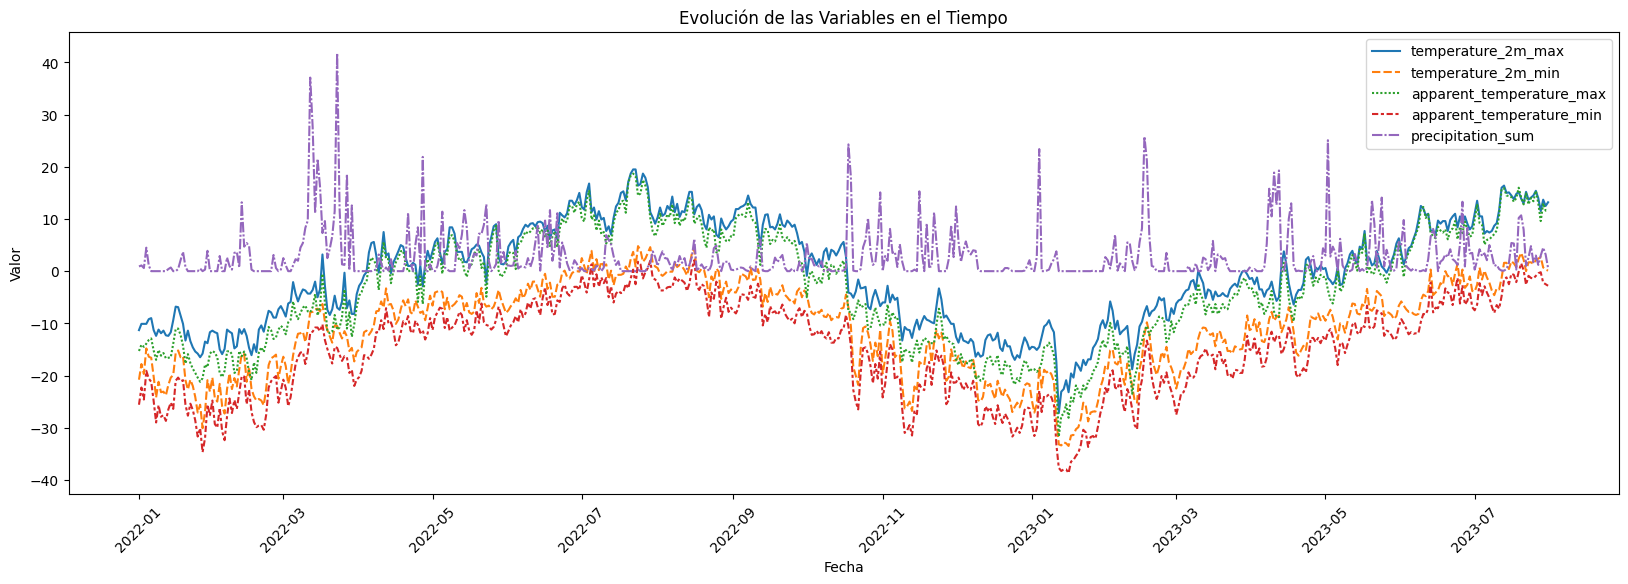

In [50]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=ultimo_anio.set_index('time'))
plt.title('Evolución de las Variables en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

Podemos ver como tenemos una serie temporal de las condiciones de manera generalizada en el **New York**, de manera general, parece haber un periodo asociado a las estaciones que se retpite casi de manera sinusoidal. 

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_16788\2890776884.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=ultimo_anio, x = 'time', y = 'precipitation_sum', palette = 'colorblind')


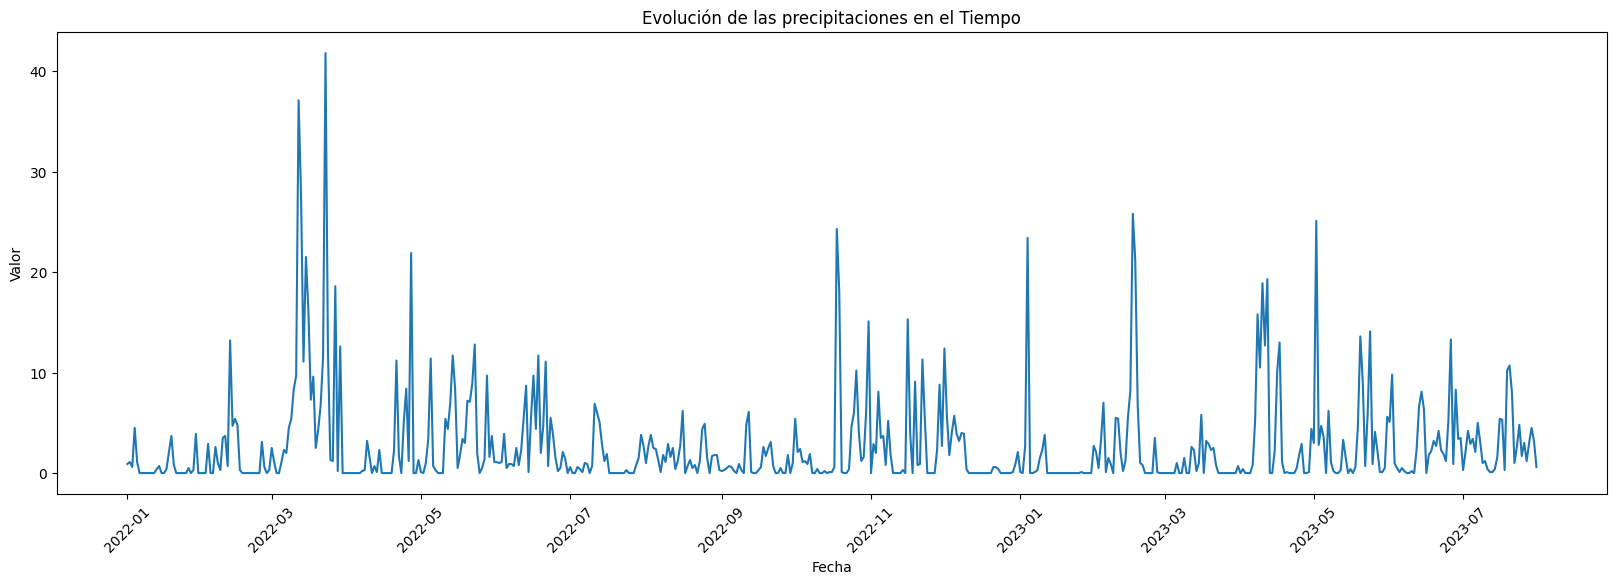

In [52]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=ultimo_anio, x = 'time', y = 'precipitation_sum', palette = 'colorblind')
plt.title('Evolución de las precipitaciones en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

Podemos asumir que existen ventanas temporales, asociadas a las estaciones donde las precipitaciones son más abundantes, sin embargo parece que en el último año las lluvias han disminuido.

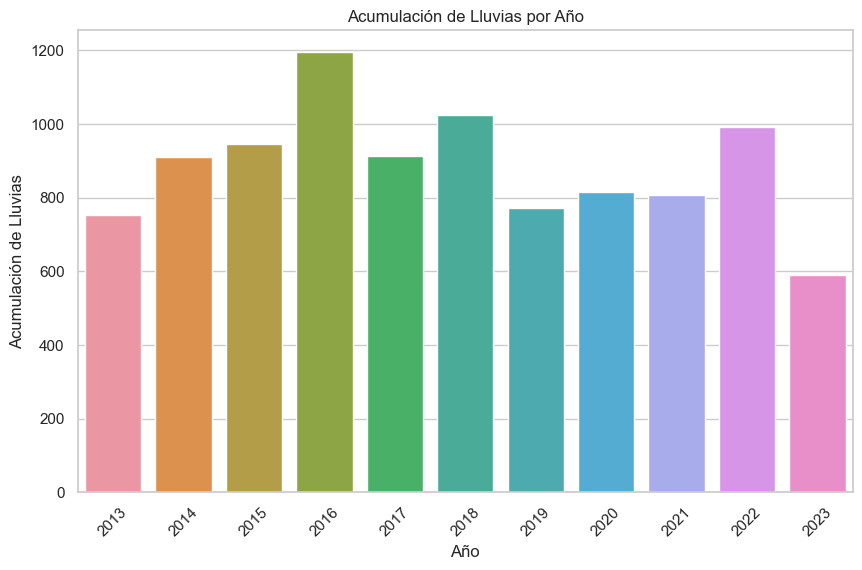

In [55]:
# Agrupar y sumar las precipitaciones por año
agrupado_por_anio = df_clima.groupby(df_clima['time'].dt.year)['precipitation_sum'].sum()

sns.set(style="whitegrid")

# Crear un gráfico de barras con la acumulación de lluvias por año
plt.figure(figsize=(10, 6))
sns.barplot(x=agrupado_por_anio.index, y=agrupado_por_anio.values)
plt.title('Acumulación de Lluvias por Año')
plt.xlabel('Año')
plt.ylabel('Acumulación de Lluvias')
plt.xticks(rotation=45)
plt.show()

Como se menciono anteriormente parece que el año 2022 tuvo más precipitaciones que el promedio. 

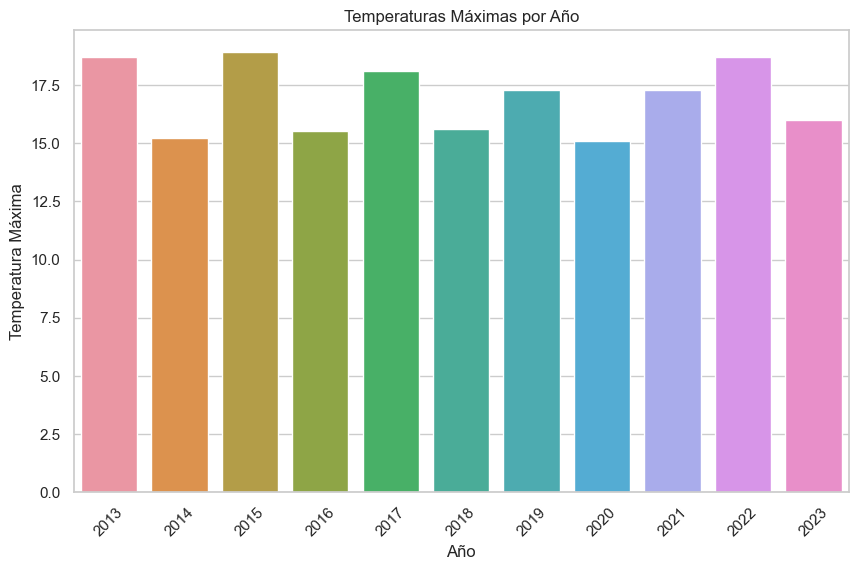

In [59]:
# Agrupar y calcular la temperatura máxima por año
agrupado_por_anio = df_clima.groupby(df_clima['time'].dt.year)['apparent_temperature_max'].max()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras con las temperaturas máximas por año
plt.figure(figsize=(10, 6))
sns.barplot(x=agrupado_por_anio.index, y=agrupado_por_anio.values)
plt.title('Temperaturas Máximas por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima')
plt.xticks(rotation=45)
plt.show()

Aparentemente las temperaturas máximas no sobrepasan los 20 grados Celcius, esto debe ser erroneo ya que en verano sobrepasan los 30 grados. Sin embargo esto se debe a que es la temperatura promedio en el día.

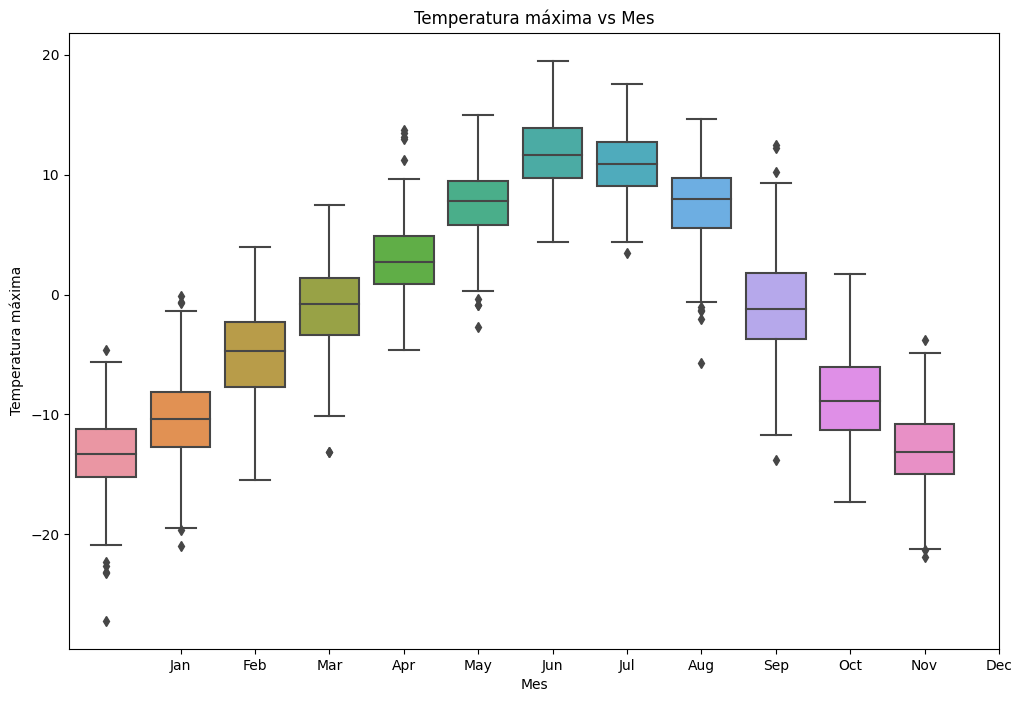

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_clima['time'].dt.month, y=df_clima['temperature_2m_max'])
plt.xlabel('Mes')
plt.ylabel('Temperatura máxima')
plt.title('Temperatura máxima vs Mes')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Se observa la clara tendencia de temperaturas según las estaciones del año.

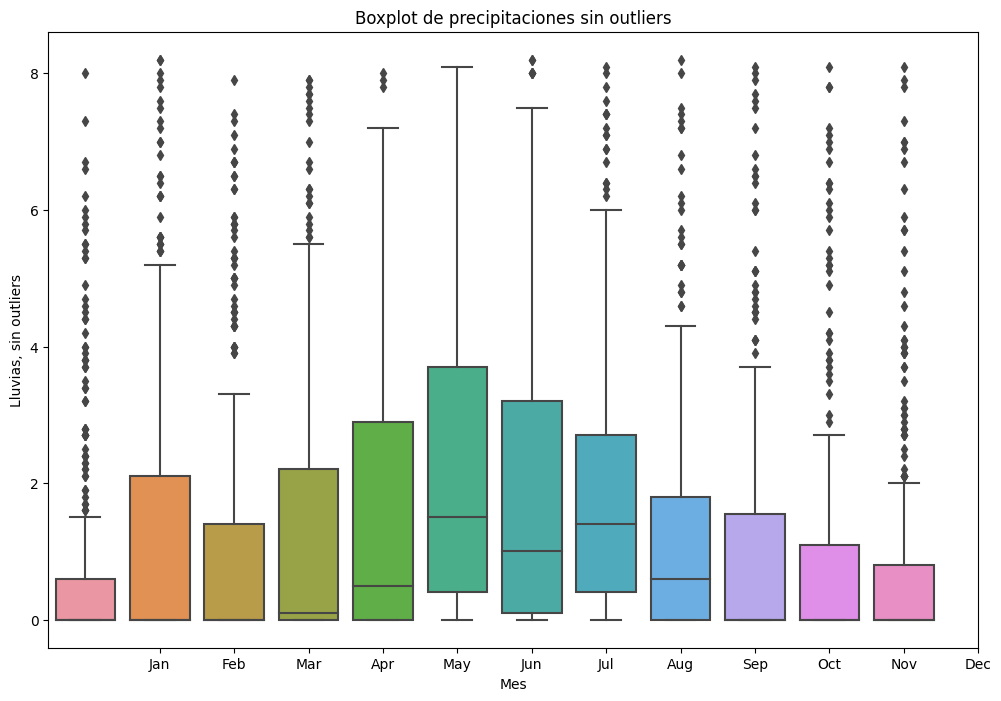

In [18]:
# Filtrar los valores atípicos utilizando el método de Tukey
def remove_outliers(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_column[(data_column >= lower_bound) & (data_column <= upper_bound)]

# Filtrar los valores atípicos en la columna de lluvias
df_clima['precipitation_sum_sin_outliers'] = remove_outliers(df_clima['precipitation_sum'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=df_clima['time'].dt.month, y=df_clima['precipitation_sum_sin_outliers'])
plt.xlabel('Mes')
plt.ylabel('Lluvias, sin outliers')
plt.title('Boxplot de precipitaciones sin outliers')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Eliminar la columna temporal sin valores atípicos (opcional)
df_clima.drop(columns=['precipitation_sum_sin_outliers'], inplace=True)


Aún habiendo un poco de outliers las precipitaciones tienen mucha variación, sin embargo, se nota que aparentemente en verano ocurren la mayoría de las precipitaciones.

De manera general podemos decir que los datos están completos y son fiables. Además se podría incorporar muchas más variables que pudiesen resultar de utilidad. Sumado a esto esta la posibilidad de analizar las mismas variables no solo por día sino cada hora. 

Se destaca una tendencia cíclica acorde a las estaciones, sin embargo se presenta mucha variación a través del tiempo, lo que denota el cambio climático.

### EDA archivo taxis --> Yellow Taxis NY

Dada la cantidad de información que se tiene, se analizará el último mes para verificar el estado general de la data. A primera vista parece buena y completa, posteriormente se analizará a nivel anual.

En este caso se toma el último mes del año actual, y se buscaran patrones y analizaran los datos de manera general.

In [2]:
import pyarrow.parquet as pq
parquet_taxi = pq.read_table('./Complementary/yellow_taxis/yellow_tripdata_2023-05.parquet')
    # Convierte la tabla a un DataFrame de pandas si lo deseas
df_taxi = parquet_taxi.to_pandas()

df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0.0,7.80,1.0,N,138,43,1,33.8,7.75,0.5,8.60,0.00,1.0,51.65,0.0,1.75
1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,2.0,8.10,1.0,N,138,262,1,35.9,10.25,0.5,9.50,0.00,1.0,57.15,2.5,1.75
2,1,2023-05-01 00:56:34,2023-05-01 01:13:39,2.0,9.10,1.0,N,138,141,1,35.2,10.25,0.5,10.70,6.55,1.0,64.20,2.5,1.75
3,2,2023-05-01 00:00:52,2023-05-01 00:20:12,1.0,8.21,1.0,N,138,140,1,33.1,6.00,0.5,2.24,0.00,1.0,47.09,2.5,1.75
4,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0.0,7.90,1.0,N,138,263,1,31.0,10.25,0.5,9.85,6.55,1.0,59.15,2.5,1.75


In [3]:
df_taxi.shape

(3513649, 19)

In [4]:
df_taxi.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.513649e+06,3513649,3513649,3.411853e+06,3.513649e+06,3.411853e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.513649e+06,3.411853e+06,3.411853e+06
mean,1.735567e+00,2023-05-16 05:14:07.530527744,2023-05-16 05:32:11.960456448,1.358800e+00,4.345816e+00,1.587358e+00,1.655896e+02,1.645084e+02,1.187269e+00,1.987687e+01,1.616245e+00,4.864523e-01,3.609887e+00,6.079624e-01,9.811791e-01,2.896298e+01,2.268303e+00,1.412078e-01
min,1.000000e+00,2002-12-31 23:28:55,2002-12-31 23:33:07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.700000e+02,-7.500000e+00,-5.000000e-01,-4.110000e+02,-4.655000e+01,-1.000000e+00,-9.005000e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-05-08 18:57:59,2023-05-08 19:12:33,1.000000e+00,1.090000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.610000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-05-16 09:27:26,2023-05-16 09:48:05,1.000000e+00,1.830000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.880000e+00,0.000000e+00,1.000000e+00,2.136000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-05-23 14:57:27,2023-05-23 15:18:09,1.000000e+00,3.510000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.520000e+00,0.000000e+00,1.000000e+00,3.144000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-09-05 18:20:48,2023-09-05 18:24:21,9.000000e+00,3.423448e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.300900e+03,1.625000e+01,4.000000e+00,7.000000e+02,1.320400e+02,1.000000e+00,6.304900e+03,2.500000e+00,1.750000e+00
std,4.437070e-01,NaN,NaN,8.796108e-01,2.933984e+02,7.071919e+00,6.399413e+01,6.989589e+01,5.427951e-01,1.920861e+01,1.872595e+00,1.049282e-01,4.140967e+00,2.215069e+00,1.909352e-01,2.395572e+01,7.862605e-01,4.830335e-01


In [6]:
df_taxi.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          101796
trip_distance                 0
RatecodeID               101796
store_and_fwd_flag       101796
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     101796
Airport_fee              101796
dtype: int64

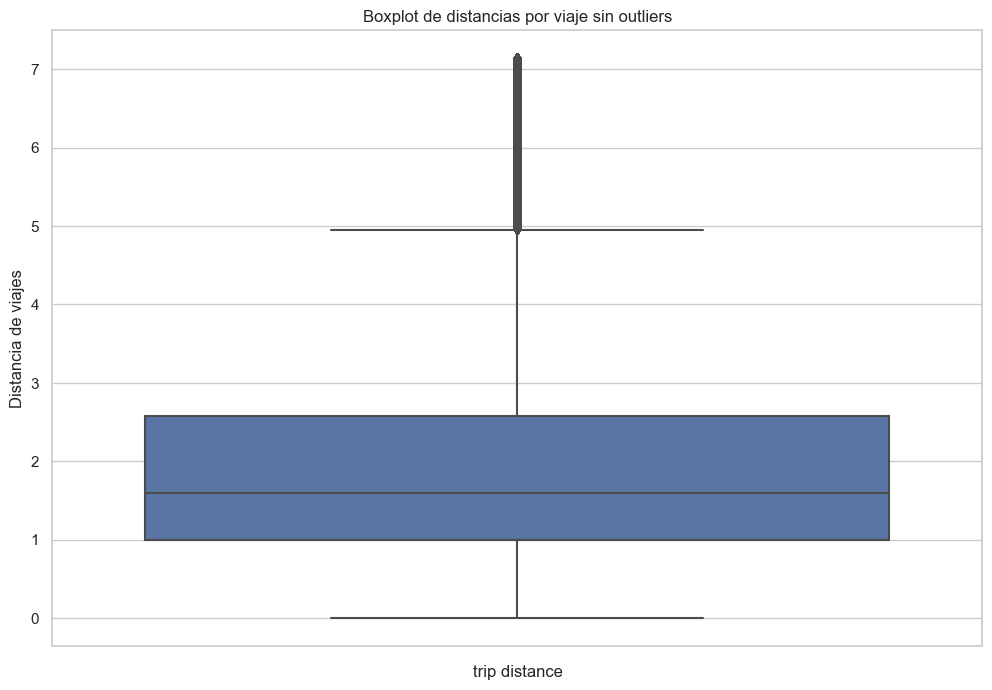

In [20]:
# Filtrar los valores atípicos utilizando el método de Tukey
def remove_outliers(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_column[(data_column >= lower_bound) & (data_column <= upper_bound)]

# Filtrar los valores atípicos en la columna de lluvias
df_taxi['trip_sin_outliers'] = remove_outliers(df_taxi['trip_distance'])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(y=df_taxi['trip_sin_outliers'])
plt.xlabel('trip distance')
plt.ylabel('Distancia de viajes')
plt.title('Boxplot de distancias por viaje sin outliers')

plt.show()

# Eliminar la columna temporal sin valores atípicos (opcional)
df_taxi.drop(columns=['trip_sin_outliers'], inplace=True)

Se observa un promedio de viajes de al rededor de 2 millas.

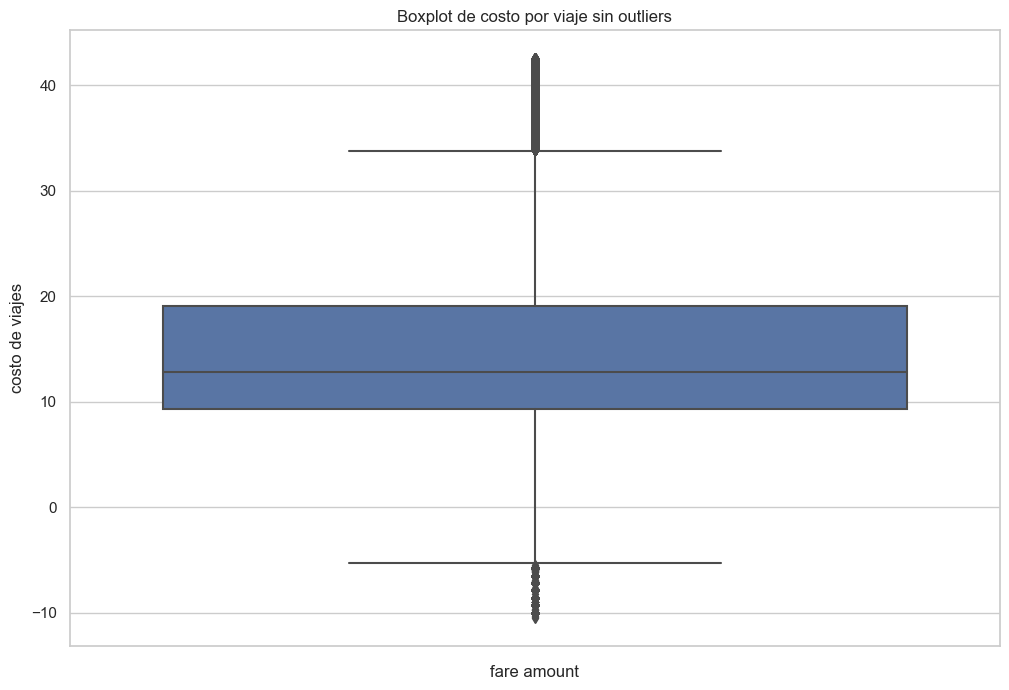

In [21]:
# Filtrar los valores atípicos en la columna de lluvias
df_taxi['fare_amount_sin_outliers'] = remove_outliers(df_taxi['fare_amount'])

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(y=df_taxi['fare_amount_sin_outliers'])
plt.xlabel('fare amount')
plt.ylabel('costo de viajes')
plt.title('Boxplot de costo por viaje sin outliers')

plt.show()

# Eliminar la columna temporal sin valores atípicos (opcional)
df_taxi.drop(columns=['fare_amount_sin_outliers'], inplace=True)

Se observa un promedio de 15 dólares por viaje sin outliers.

Para el tipo de pago se debe tener en cuenta que:
**0= Credit card**
**1= Cash**
**2= No charge**
**3= Dispute**
**4= Unknown**
**5= Voided trip**

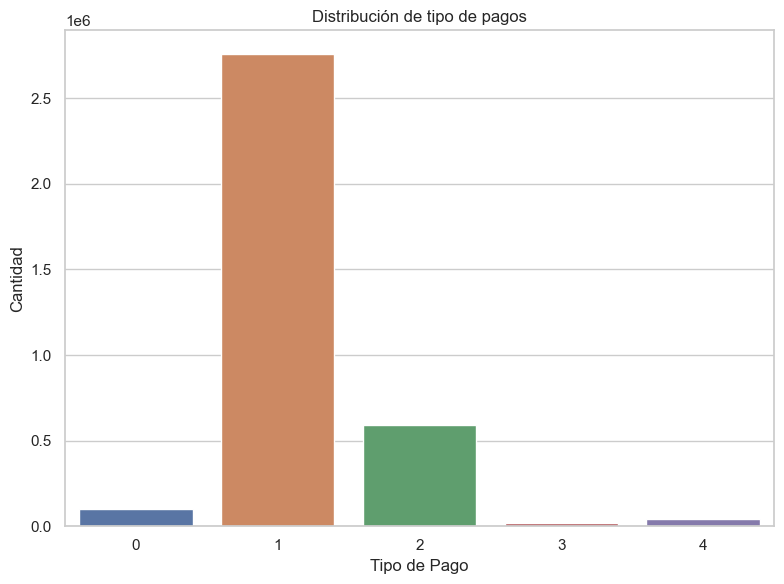

In [23]:
sns.set(style="whitegrid")

# Calcular la frecuencia de cada tipo de pago
payment_type_counts = df_taxi["payment_type"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values)
plt.title("Distribución de tipo de pagos")
plt.xlabel("Tipo de Pago")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se observa que la mayoría de los pagos son en efectivo, lo cual tiene sentido.

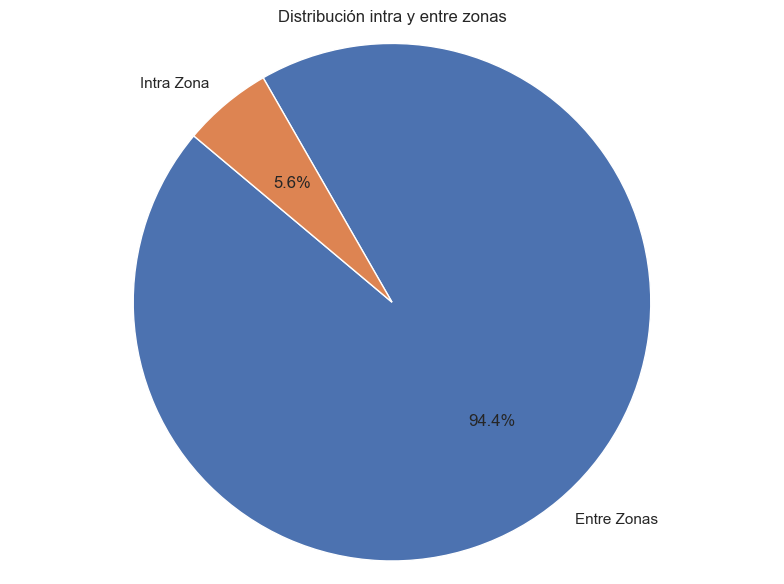

In [25]:
total_trips = len(df_taxi)

# Crear una nueva columna para indicar si el viaje es Intra o Entre Lugares
df_taxi['Trip_Type'] = df_taxi.apply(lambda row: 'Intra Zona' if row['PULocationID'] == row['DOLocationID'] else 'Entre Zonas', axis=1)

# Calcular los porcentajes de viajes 
trip_type_percentages = df_taxi['Trip_Type'].value_counts(normalize=True) * 100

# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(trip_type_percentages, labels=trip_type_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución intra y entre zonas")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se oberva que casi la totalidad de los viajes incluye el traslado entre distintas "***Taxi Zone***"

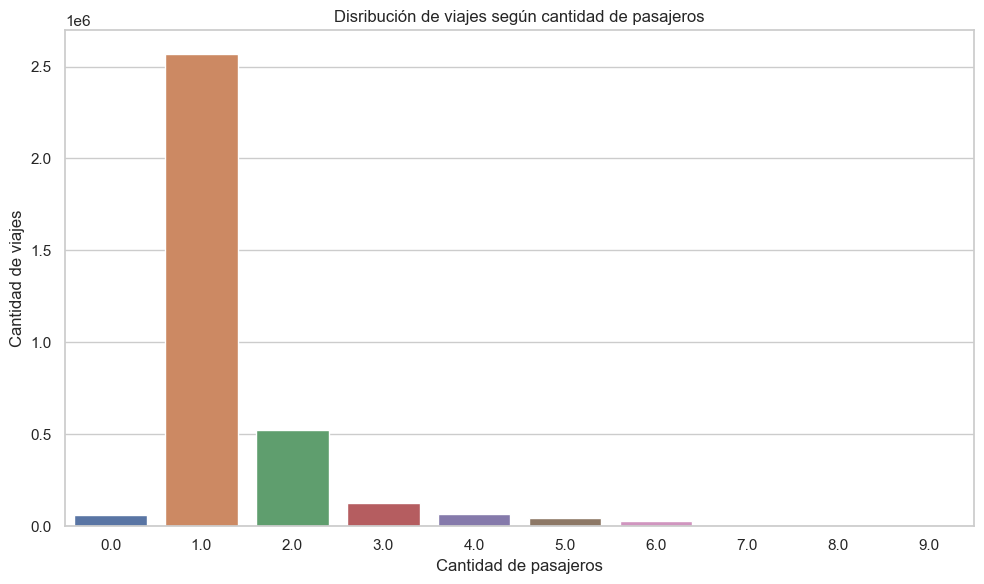

In [27]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Calcular el recuento de viajes por cantidad de pasajeros
passenger_counts = df_taxi["passenger_count"].value_counts()

# Ordenar los valores por cantidad de pasajeros
passenger_counts = passenger_counts.sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_counts.index, y=passenger_counts.values)
plt.title("Disribución de viajes según cantidad de pasajeros")
plt.xlabel("Cantidad de pasajeros")
plt.ylabel("Cantidad de viajes")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se observa que gran porcentaje de los viajes son con un pasajero, seguido por 2, 3 y 4. Notar que se trata con números en torno al millón.

En conclusión se tiene una gran cantidad de viajes, pensando que estamos solo ante los viajes del mes 05/2023 y superan los 3 millones. Sin embargo a simple vista se tiene una data de buena calidad que aporta mucha información al análisis. 

Deberá encontrarse una forma de cargar todos los datos al DW que se diseñe, a modo de poder tener la data online y evitar consumir recursos locales. Además se recomienda reducir la ventana de trabajo a máximo dos años, a la vez que se recomienda hacer análisis mensuales, o promedidado de datos en general, mensuales, diarios, etc.

### EDA archivo Car Noise --> Car Noise Scrapping

In [2]:
df_car = pd.read_csv('./Complementary/car_noise.csv')
df_car.head()

,Brand,Model,Spec,Year,dB at idle,dB at 55 mph,dB at 65 mph,dB at 70 mph,dB at 75 mph,dB at 85 mph
0,Abarth,500,1.4 16v T-Jet,2008,47.3,67.3,70.2,70.4,72.9,75.6
1,Abarth,595,Competizione,2017,49.9,69.1,72.5,72.8,72.2,75.8
2,Acura,MDX,3.5 V6,2013,41.7,59.0,62.0,62.2,64.9,65.9
3,Acura,RDX,3.5 V6,2012,43.0,62.7,66.1,66.3,68.4,69.1
4,Acura,RL,3.7 V6,2009,43.6,64.3,67.9,68.1,71.3,72.4


In [4]:
df_car.describe()

,Year,dB at idle,dB at 55 mph,dB at 65 mph,dB at 70 mph,dB at 75 mph,dB at 85 mph
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,2012.539071,43.601901,62.633052,66.178617,66.543506,68.615839,70.770275
std,3.268946,4.027908,2.931173,2.785126,2.782676,2.892861,3.024234
min,2008.000000,26.300000,53.400000,56.000000,56.200000,58.600000,59.400000
25%,2010.000000,41.300000,60.800000,64.425000,64.800000,66.700000,68.800000
50%,2012.000000,43.800000,62.600000,66.100000,66.500000,68.400000,70.600000
75%,2016.000000,45.575000,64.400000,67.800000,68.100000,70.200000,72.300000
max,2018.000000,66.700000,76.300000,79.600000,79.800000,82.600000,84.300000


A simple vista podemos mencionar que aparentemente los db son directamente proporcionales a la velocidad, lo cual tiene sentido dado el funcionamiento mecánico de un motor.

In [11]:
speed_columns = ['dB at idle','dB at 55 mph', 'dB at 65 mph', 'dB at 70 mph', 'dB at 75 mph', 'dB at 85 mph']

# Crear un DataFrame derretido para la visualización
df_speed = df_car.melt(value_vars=speed_columns, var_name='Speed', value_name='Noise Level')

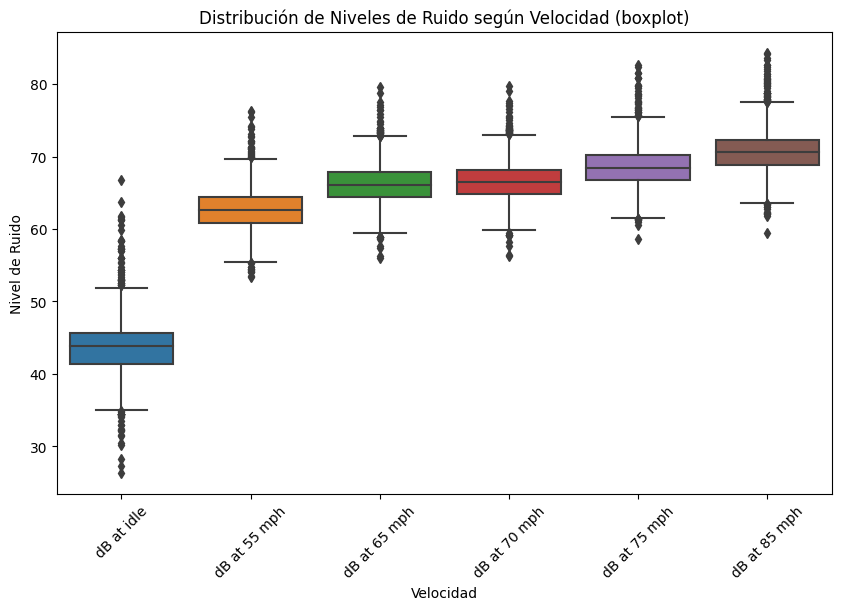

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Speed', y='Noise Level', data=df_speed)
plt.title('Distribución de Niveles de Ruido según Velocidad (boxplot)')
plt.xlabel('Velocidad')
plt.ylabel('Nivel de Ruido')
plt.xticks(rotation=45)
plt.show()

El gráfico anterior reafirma la hipótesis inicial.

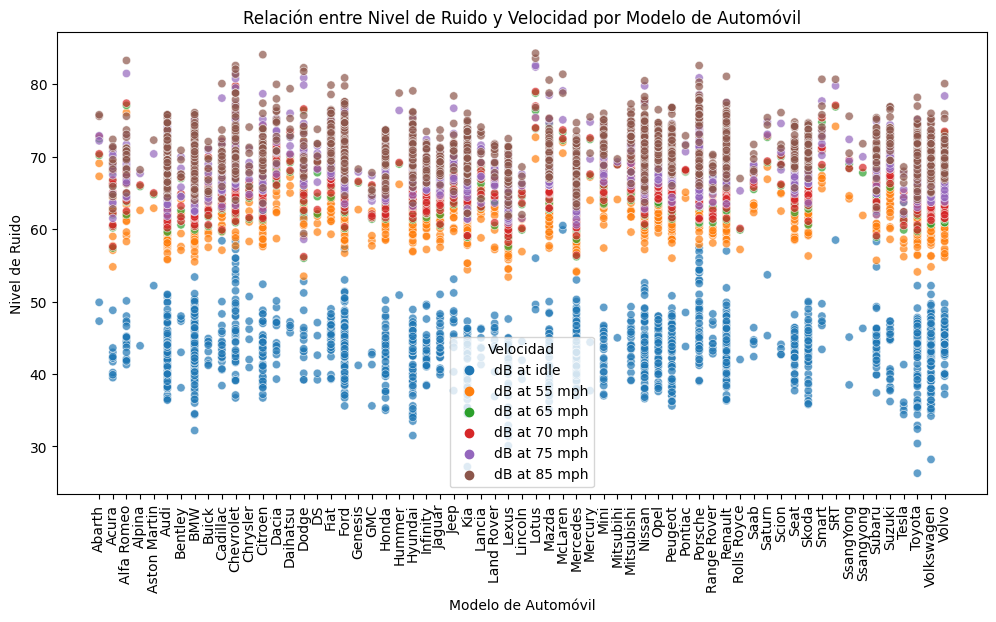

In [19]:
# Melt el DataFrame para crear una columna "Speed" y "Noise Level"
df_melted = df_car.melt(id_vars=['Brand'], value_vars=speed_columns, var_name='Speed', value_name='Noise Level')

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Brand', y='Noise Level', hue='Speed', data=df_melted, alpha=0.7)
plt.title('Relación entre Nivel de Ruido y Velocidad por Modelo de Automóvil')
plt.xlabel('Modelo de Automóvil')
plt.ylabel('Nivel de Ruido')
plt.xticks(rotation=90)
plt.legend(title='Velocidad')
plt.show()

Se puede ver que independiente de la marca, el ruido a mayor velocidad es mayor, además de que como en el box plot, la dispersión más amplia de ruidos es en el estado inactivo **at idle**

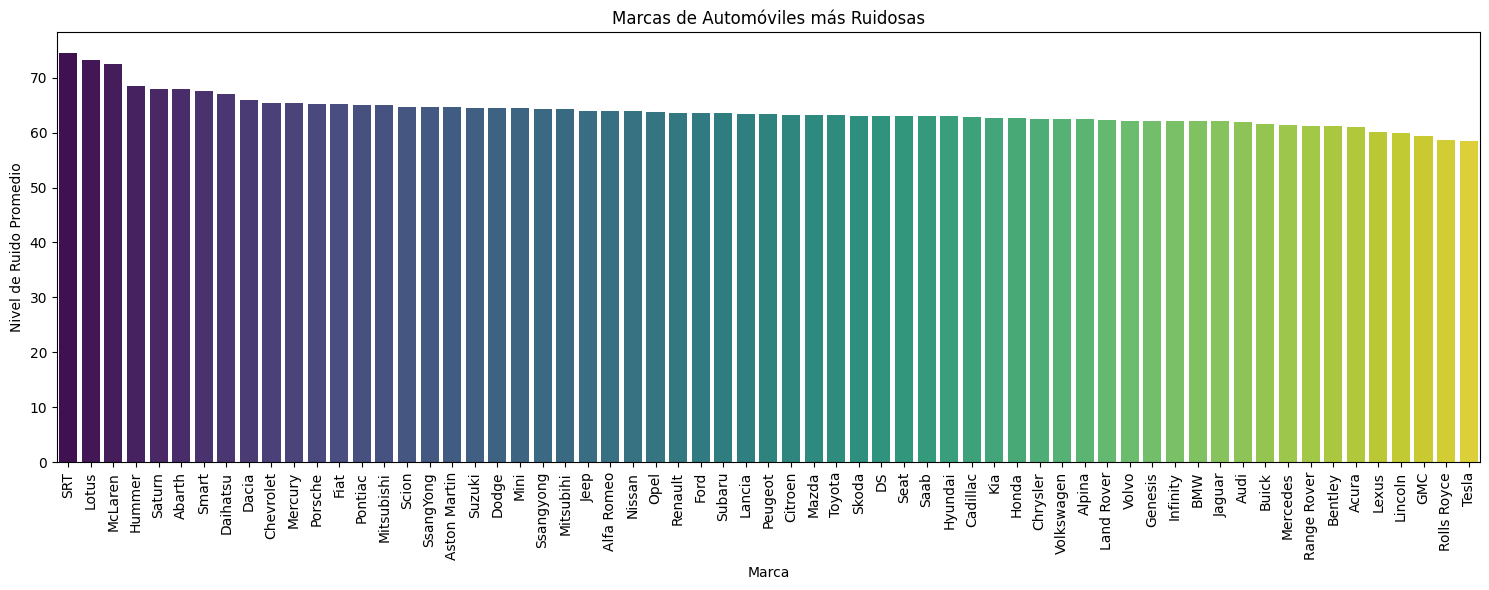

In [37]:

# Calcular el promedio de los niveles de ruido por marca
average_noise_by_brand = df_car.groupby('Brand')[['dB at idle','dB at 55 mph', 'dB at 65 mph', 'dB at 70 mph', 'dB at 75 mph', 'dB at 85 mph']].mean()

# Calcular el promedio total de los niveles de ruido para ordenar las marcas
average_noise_by_brand['Average Noise'] = average_noise_by_brand.mean(axis=1)
average_noise_by_brand = average_noise_by_brand.sort_values(by='Average Noise', ascending=False)

# Crear un gráfico de barras para las marcas más ruidosas
plt.figure(figsize=(15, 6))
sns.barplot(x=average_noise_by_brand.index, y='Average Noise', data=average_noise_by_brand, palette='viridis')
plt.title('Marcas de Automóviles más Ruidosas')
plt.xlabel('Marca')
plt.ylabel('Nivel de Ruido Promedio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Analizando a groso modo el nombre de las marcas vemos que las marcas que suelen cotizar más alto son aquellas que presentan menos ruido promedio. 

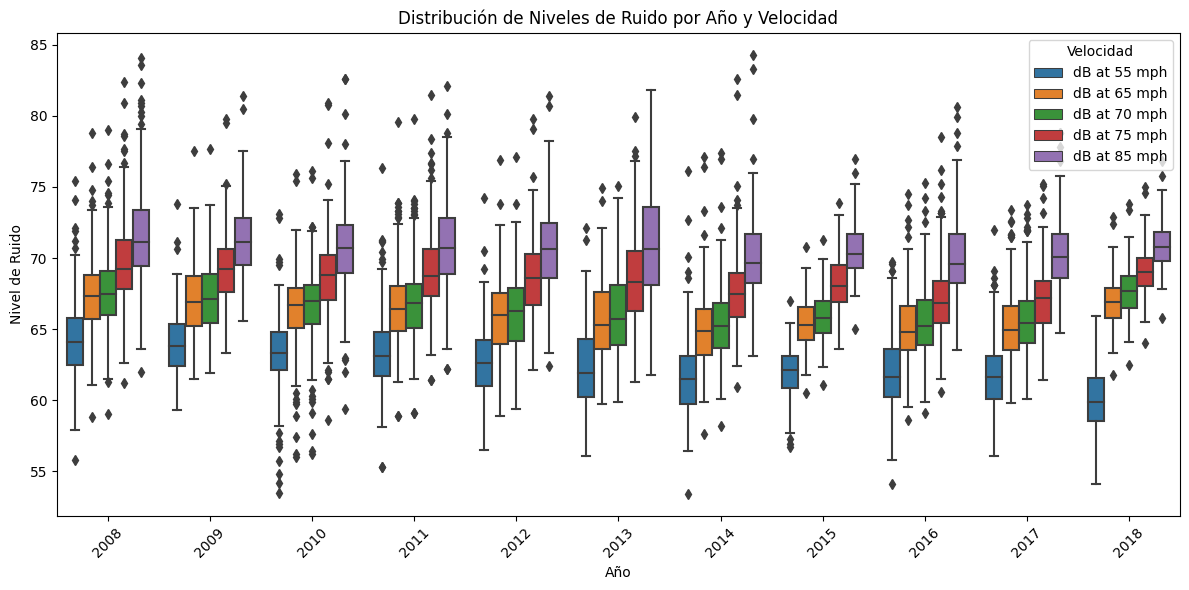

In [39]:
columns = ['Year','dB at 55 mph', 'dB at 65 mph', 'dB at 70 mph', 'dB at 75 mph', 'dB at 85 mph']

df_melted = df_car.melt(id_vars=['Year'], value_vars=columns[1:], var_name='Speed', value_name='Noise Level')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Noise Level', hue='Speed', data=df_melted)
plt.title('Distribución de Niveles de Ruido por Año y Velocidad')
plt.xlabel('Año')
plt.ylabel('Nivel de Ruido')
plt.xticks(rotation=45)
plt.legend(title='Velocidad')
plt.tight_layout()
plt.show()

Si bien la diferencia no es tan marcada, parece haber una tendencia a los autos más silenciosos. Además, al pasar de años, la variación de ruidos entre una determinada velocidad disminuye, esto va de la mano con el perfeccionamiento y avances tecnológicos.

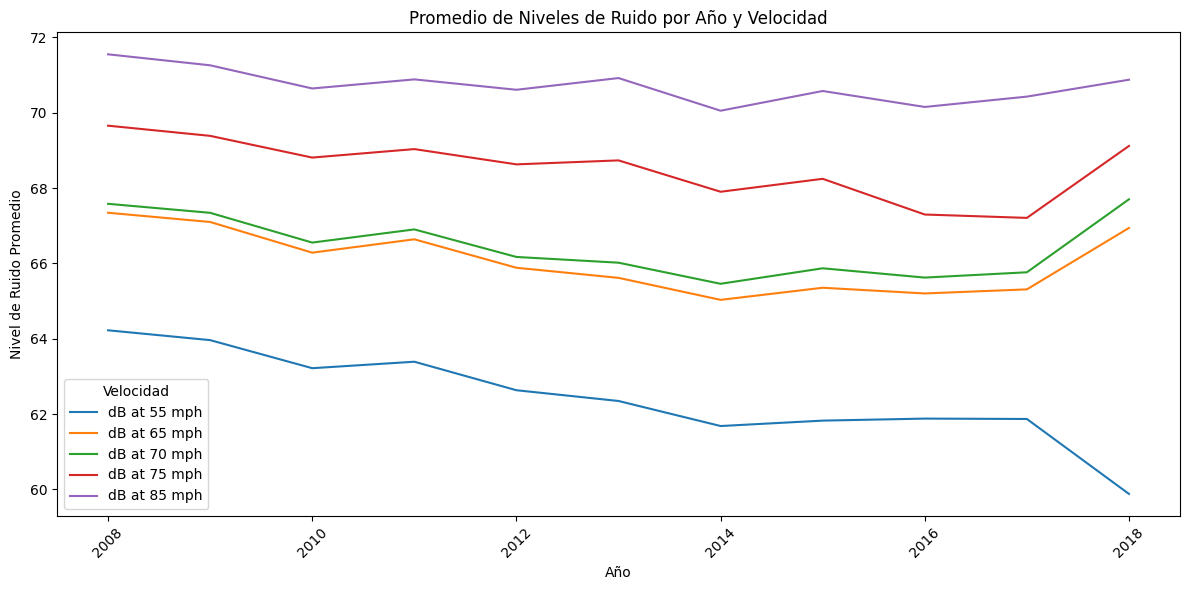

In [43]:
# Seleccionar las columnas relevantes
speed_columns = ['dB at 55 mph', 'dB at 65 mph', 'dB at 70 mph', 'dB at 75 mph', 'dB at 85 mph']

# Calcular el promedio de niveles de ruido por año y velocidad
average_noise_by_year = df_car.groupby('Year')[speed_columns].mean()

plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
for column in speed_columns:
    sns.lineplot(data=average_noise_by_year, x=average_noise_by_year.index, y=column, label=column)
plt.title('Promedio de Niveles de Ruido por Año y Velocidad')
plt.xlabel('Año')
plt.ylabel('Nivel de Ruido Promedio')
plt.xticks(rotation=45)
plt.legend(title='Velocidad')
plt.tight_layout()
plt.show()

En este gráfico, podemos ver la evolución promedio del ruido en db de autos, algo a destacar, que en el rango de interés, lo que se supone circulan los taxis o vehículos de transporte el ruido a disminuido en el rango temporal que se tiene. 

En términos generales, los datos son de muy buena calidad, la falencia es el rango temporal limitado al 2018, sin embargo podrían ser utilizados de igual modo, se estaría sobre estimando el ruido al año actual, dada la tendencia general a la disminución de ruidos.